In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms



In [2]:

# データの前処理
transform = transforms.Compose([transforms.ToTensor()])

# MNISTデータセットのロード
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [ ]:


# 自己エンコーダのクラスを定義
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 4),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


Epoch [1/50], Loss: 0.06478080985102572
Epoch [2/50], Loss: 0.04955746084133954
Epoch [3/50], Loss: 0.04499655758648285
Epoch [4/50], Loss: 0.04311543059295048
Epoch [5/50], Loss: 0.041916257397992526
Epoch [6/50], Loss: 0.03959799878227749
Epoch [7/50], Loss: 0.03724439017204588
Epoch [8/50], Loss: 0.03631306234310304
Epoch [9/50], Loss: 0.03560563349234524
Epoch [10/50], Loss: 0.03512150824649819
Epoch [11/50], Loss: 0.034731025966420484
Epoch [12/50], Loss: 0.03436650274627244
Epoch [13/50], Loss: 0.03406205607939567
Epoch [14/50], Loss: 0.033782067144714566
Epoch [15/50], Loss: 0.0335952349062731
Epoch [16/50], Loss: 0.03339377661019182
Epoch [17/50], Loss: 0.03322009132630917
Epoch [18/50], Loss: 0.033150427186412854
Epoch [19/50], Loss: 0.03279709432925433
Epoch [20/50], Loss: 0.03245197902761225
Epoch [21/50], Loss: 0.031803722487393216
Epoch [22/50], Loss: 0.030799936235093993
Epoch [23/50], Loss: 0.030238340084534337
Epoch [24/50], Loss: 0.029811406116892914
Epoch [25/50], Los

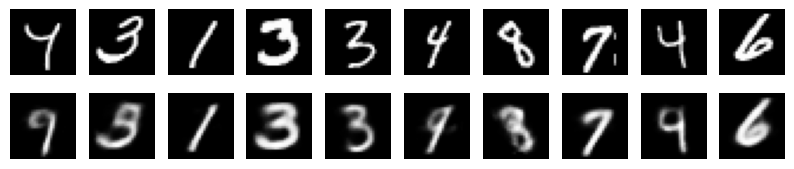

In [11]:

# 自己エンコーダの初期化
autoencoder = Autoencoder()

# 損失関数とオプティマイザの定義
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# 学習
num_epochs = 50
for epoch in range(num_epochs):
    running_loss = 0.0
    for data in trainloader:
        inputs, _ = data
        inputs = inputs.view(inputs.size(0), -1)
        optimizer.zero_grad()

        # エンコードしてデコードし、入力画像を再構築
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(trainloader)}")

print("Finished Training")

# テストデータから特徴量と再構築画像を取得
with torch.no_grad():
    dataiter = iter(trainloader)
    images, _ = next(dataiter)  # next()を使ってイテレータからデータを取得
    images = images.view(images.size(0), -1)
    encoded_features = autoencoder.encoder(images)
    reconstructed_images = autoencoder.decoder(encoded_features)

# 特徴量を表示
print("Encoded Features:")
print(encoded_features)

# 元の画像と再構築された画像を表示
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 2))
for i in range(10):
    axes[0, i].imshow(images[i].view(28, 28).numpy(), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(reconstructed_images[i].view(28, 28).numpy(), cmap='gray')
    axes[1, i].axis('off')

plt.show()


In [12]:
print(encoded_features[0])

tensor([1.7587, 6.0755, 1.7640, 0.5518])


In [20]:


# 自己エンコーダのクラスを定義
class CustomAutoencoder(nn.Module):
    def __init__(self):
        super(CustomAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  # 畳み込み層
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),  # 畳み込み層
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=7),  # 畳み込み層
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=7),  # 逆畳み込み層
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  # 逆畳み込み層
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),  # 逆畳み込み層
            nn.Sigmoid(),  # 出力を0～1に正規化
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [21]:
# 自己エンコーダの初期化
autoencoder = CustomAutoencoder()

# 損失関数とオプティマイザの定義
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# 学習
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for data in trainloader:
        inputs, _ = data
        optimizer.zero_grad()

        # エンコードしてデコードし、入力画像を再構築
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(trainloader)}")


print("Finished Training")

# テストデータから特徴量と再構築画像を取得
with torch.no_grad():
    dataiter = iter(trainloader)
    images, _ = next(dataiter)  # next()を使ってイテレータからデータを取得
    images = images.view(images.size(0), -1)
    encoded_features = autoencoder.encoder(images)
    reconstructed_images = autoencoder.decoder(encoded_features)

# 特徴量を表示
print("Encoded Features:")
print(encoded_features)

# 元の画像と再構築された画像を表示
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 2))
for i in range(10):
    axes[0, i].imshow(images[i].view(28, 28).numpy(), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(reconstructed_images[i].view(28, 28).numpy(), cmap='gray')
    axes[1, i].axis('off')

plt.show()


Epoch [1/10], Loss: 0.037996266016375214
Epoch [2/10], Loss: 0.010014141757867292
Epoch [3/10], Loss: 0.007188850881726439
Epoch [4/10], Loss: 0.0059845173991581145
Epoch [5/10], Loss: 0.005367124728215084
Epoch [6/10], Loss: 0.005029715938187802
Epoch [7/10], Loss: 0.004796494658329467
Epoch [8/10], Loss: 0.004634446190195535
Epoch [9/10], Loss: 0.0045081786935461925
Epoch [10/10], Loss: 0.004396119144068026
Finished Training


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [64, 784]